In [3]:
import numpy as np
import os
import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)


print('Numpy version ', np.__version__)
print('Pandas version ',pd.__version__)

Numpy version  1.21.5
Pandas version  1.4.4


In [27]:
def normal_(wave, I, point, n):
    dff = wave-point
    order = list(abs(dff)).index(min(abs(dff)))
    n = int(n)
    value = np.nanmedian(I[order-n:order:n])
    return value

def normal_f(wave, I, point):
    dff = wave-point
    order = list(abs(dff)).index(min(abs(dff)))
    value = np.nanmedian(I[order])
    return value

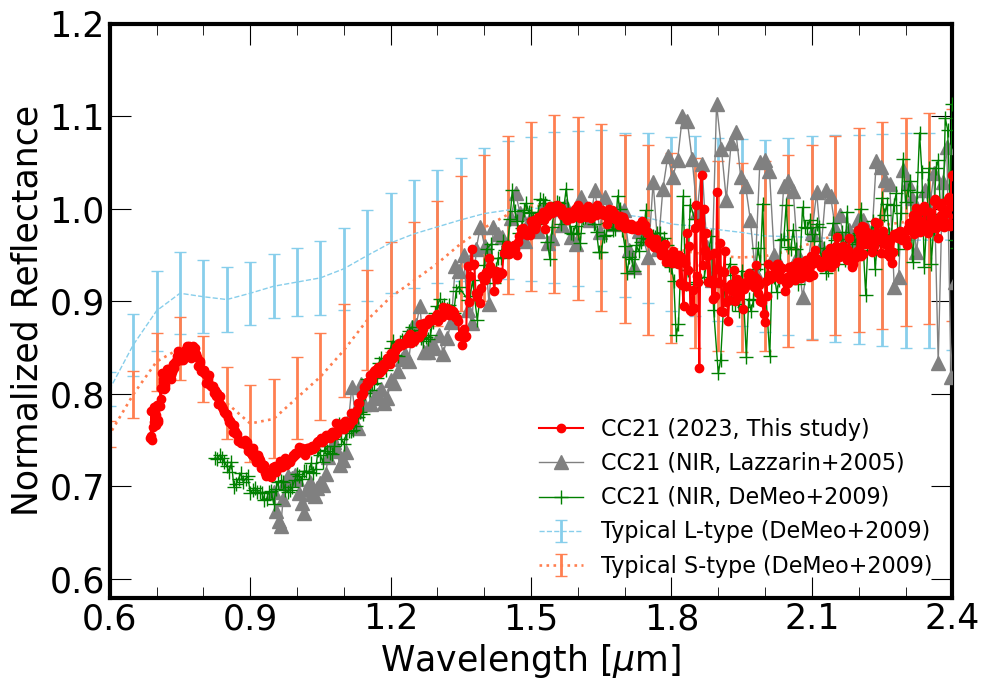

In [35]:
#Bring the CC21 spectrum derived by the script "Deriving the 2001 CC21 spectra"
CC21_all = pd.read_csv('CC21_combine.csv')
CC21_all = CC21_all[CC21_all['err']<0.2]

#Bring the L and S-type's spectrum from DeMeo et al. 2009(http://smass.mit.edu/_documents/busdemeo-meanspectra.xlsx)
Demeo = pd.read_csv('busdemeo-meanspectra.csv')

#Bring the CC21's spectrum from DeMeo et al. 2009
NIR = os.path.join('DeMeo_CC21_NIR_2009.csv')
NIR = pd.read_csv(NIR)
NIR = NIR[NIR['flag']!=0]

#Bring the CC21's spectrum from Lazzarin et al. 2005
la = pd.read_csv('Lazzarin_2005.csv')
la = la.sort_values(by=['wave'])


#Normalize the reflectance at 1.6um becomes the unity
normal_value = 1.6



fig,ax = plt.subplots(1,1,figsize=(10,7))
plt.rcParams['axes.linewidth'] = 2
nor = normal_(C_['wave'],C_['I'],normal_value,3)
ax.errorbar(C_['wave'],C_['I']/nor,marker='o',ms=6,
                color='r',zorder=7010)
ax.plot(-999,-999,marker='o',
           label='CC21 (2023, This study)', color='r',
           zorder=20)
la = la[la['wave']>0.95]
nor = normal_(la['wave'],la['I'],normal_value,4)
ax.errorbar(la['wave'],la['I']/nor,marker='^',ms=10,
            lw=1,color='gray',label=r'CC21 (NIR, Lazzarin+2005)',
           zorder=1000) 
nor = normal_(NIR['wave'],NIR['I'].values,normal_value,4)
ax.errorbar(NIR['wave'],NIR['I']/nor,marker='+',ms=10,
                 lw=1,color='g',label=r'CC21 (NIR, DeMeo+2009)',
           zorder=4000) 

nor = normal_f(Demeo['Wavelength'],Demeo['L_Mean'].values,normal_value)
ax.errorbar(Demeo['Wavelength'], Demeo['L_Mean']/nor, yerr=Demeo['L_Sigma']/nor, lw=1,
            ls='--',elinewidth=2,
            capsize=4,color='skyblue',label='Typical L-type (DeMeo+2009)')

nor = normal_f(Demeo['Wavelength'],Demeo['S_Mean'].values,normal_value)
ax.errorbar(Demeo['Wavelength'], Demeo['S_Mean']/nor, yerr=Demeo['S_Sigma']/nor, lw=1.9,ls=':',elinewidth=2,
            capsize=4,color='coral',label='Typical S-type (DeMeo+2009)')

ax.tick_params(axis='both',labelsize=25)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.tick_params(axis = 'both', which='minor', length=8)
ax.tick_params(axis ='both',which='both', direction='in')
ax.tick_params(axis ='both',which='major', length=15)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_xlabel(r'Wavelength [$\mu$m]',fontsize=25)
ax.set_ylabel('Normalized Reflectance',fontsize=25)
ax.set_xlim(0.7,2.4)
ax.set_ylim(0.58,1.2)
ax.set_xticks(np.arange(0.6,2.6,0.3))
 
ax.legend(fontsize=16,frameon=False)
plt.tight_layout()
plt.rcParams['axes.linewidth'] = 3
plt.show()